<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 121.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 113.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 69.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 54.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 59.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 15.2 MB/s eta 0:00:

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
# Check for missing values in critical columns
critical_columns = ['Employment', 'JobSat', 'RemoteWork']

# Check missing values
missing_values = df[critical_columns].isnull().sum()
print("Missing values in critical columns:")
print(missing_values)

# Handle missing values for each column
for column in critical_columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':  # Categorical column
            # Impute with the most frequent value (mode)
            most_frequent_value = df[column].mode()[0]
            df[column] = df[column].fillna(most_frequent_value)  # Assign to the column directly
            print(f"Missing values in '{column}' replaced with the most frequent value.")
        else:  # Numerical column (e.g., JobSat)
            # Impute with the median (or mean if appropriate)
            median_value = df[column].median()
            df[column] = df[column].fillna(median_value)  # Assign to the column directly
            print(f"Missing values in '{column}' replaced with the median value.")
    else:
        print(f"No missing values in '{column}'.")

# Verify the missing values after imputation
missing_values_after = df[critical_columns].isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after)


Missing values in critical columns:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
No missing values in 'Employment'.
Missing values in 'JobSat' replaced with the median value.
Missing values in 'RemoteWork' replaced with the most frequent value.

Missing values after imputation:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


ExperienceRange
0-5 years      7.0
5-10 years     7.0
10-20 years    7.0
>20 years      7.0
Name: JobSat, dtype: float64


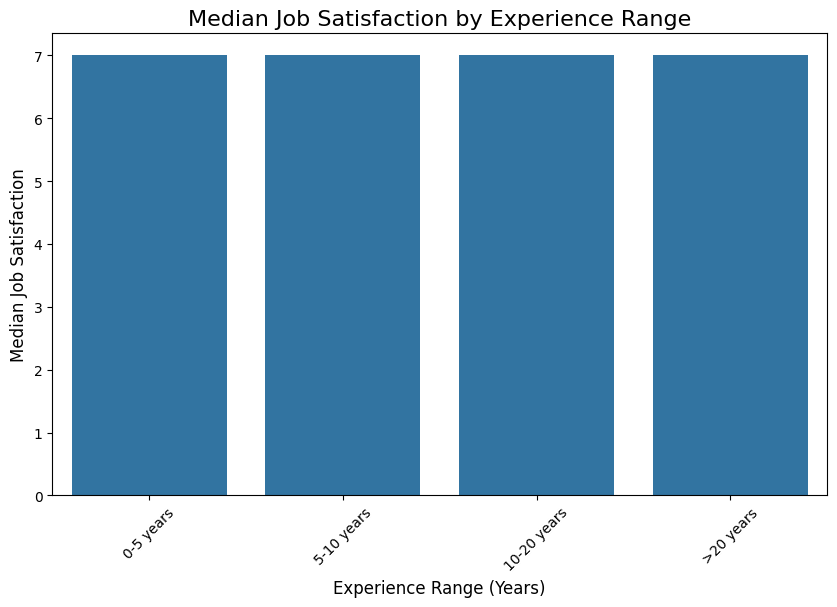

In [5]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'YearsCodePro' to numeric, forcing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Handle missing or invalid values, e.g., drop rows with NaN in 'YearsCodePro' or fill with a placeholder
df.dropna(subset=['YearsCodePro'], inplace=True)

# Define experience ranges for 'YearsCodePro'
bins = [0, 5, 10, 20, float('inf')]  # 0-5, 5-10, 10-20, >20 years
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

# Create a new column 'ExperienceRange' based on the defined bins
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate the median JobSat for each experience range, explicitly setting observed=True
median_job_sat = df.groupby('ExperienceRange', observed=True)['JobSat'].median()

# Print the median JobSat for each experience range
print(median_job_sat)

# Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=median_job_sat.index, y=median_job_sat.values)

# Customize plot
plt.title('Median Job Satisfaction by Experience Range', fontsize=16)
plt.xlabel('Experience Range (Years)', fontsize=12)
plt.ylabel('Median Job Satisfaction', fontsize=12)
plt.xticks(rotation=45)
plt.show()





#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


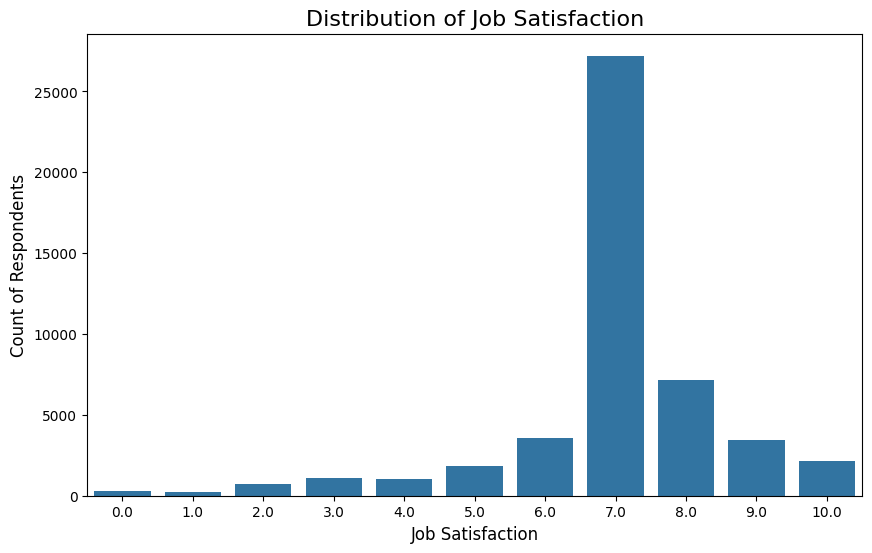

In [6]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size for better readability
plt.figure(figsize=(10, 6))

# Create a count plot for the 'JobSat' column
sns.countplot(x='JobSat', data=df)

# Customize plot appearance
plt.title('Distribution of Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)

# Show the plot
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


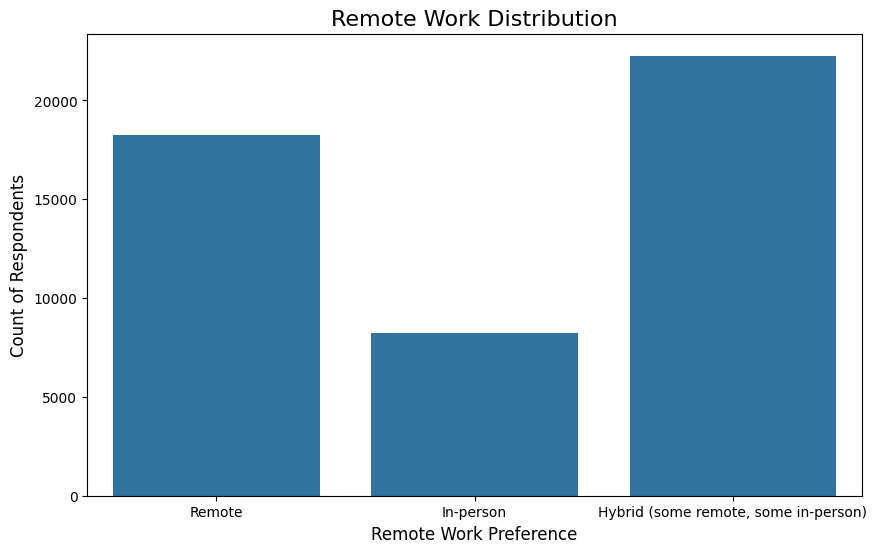

In [7]:
## Write your code here
# Create a count plot for the 'RemoteWork' column
plt.figure(figsize=(10, 6))
sns.countplot(x='RemoteWork', data=df)

# Customize plot appearance
plt.title('Remote Work Distribution', fontsize=16)
plt.xlabel('Remote Work Preference', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)

# Show the plot
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [8]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'ExperienceRange'],
      dtype='object', length=115)

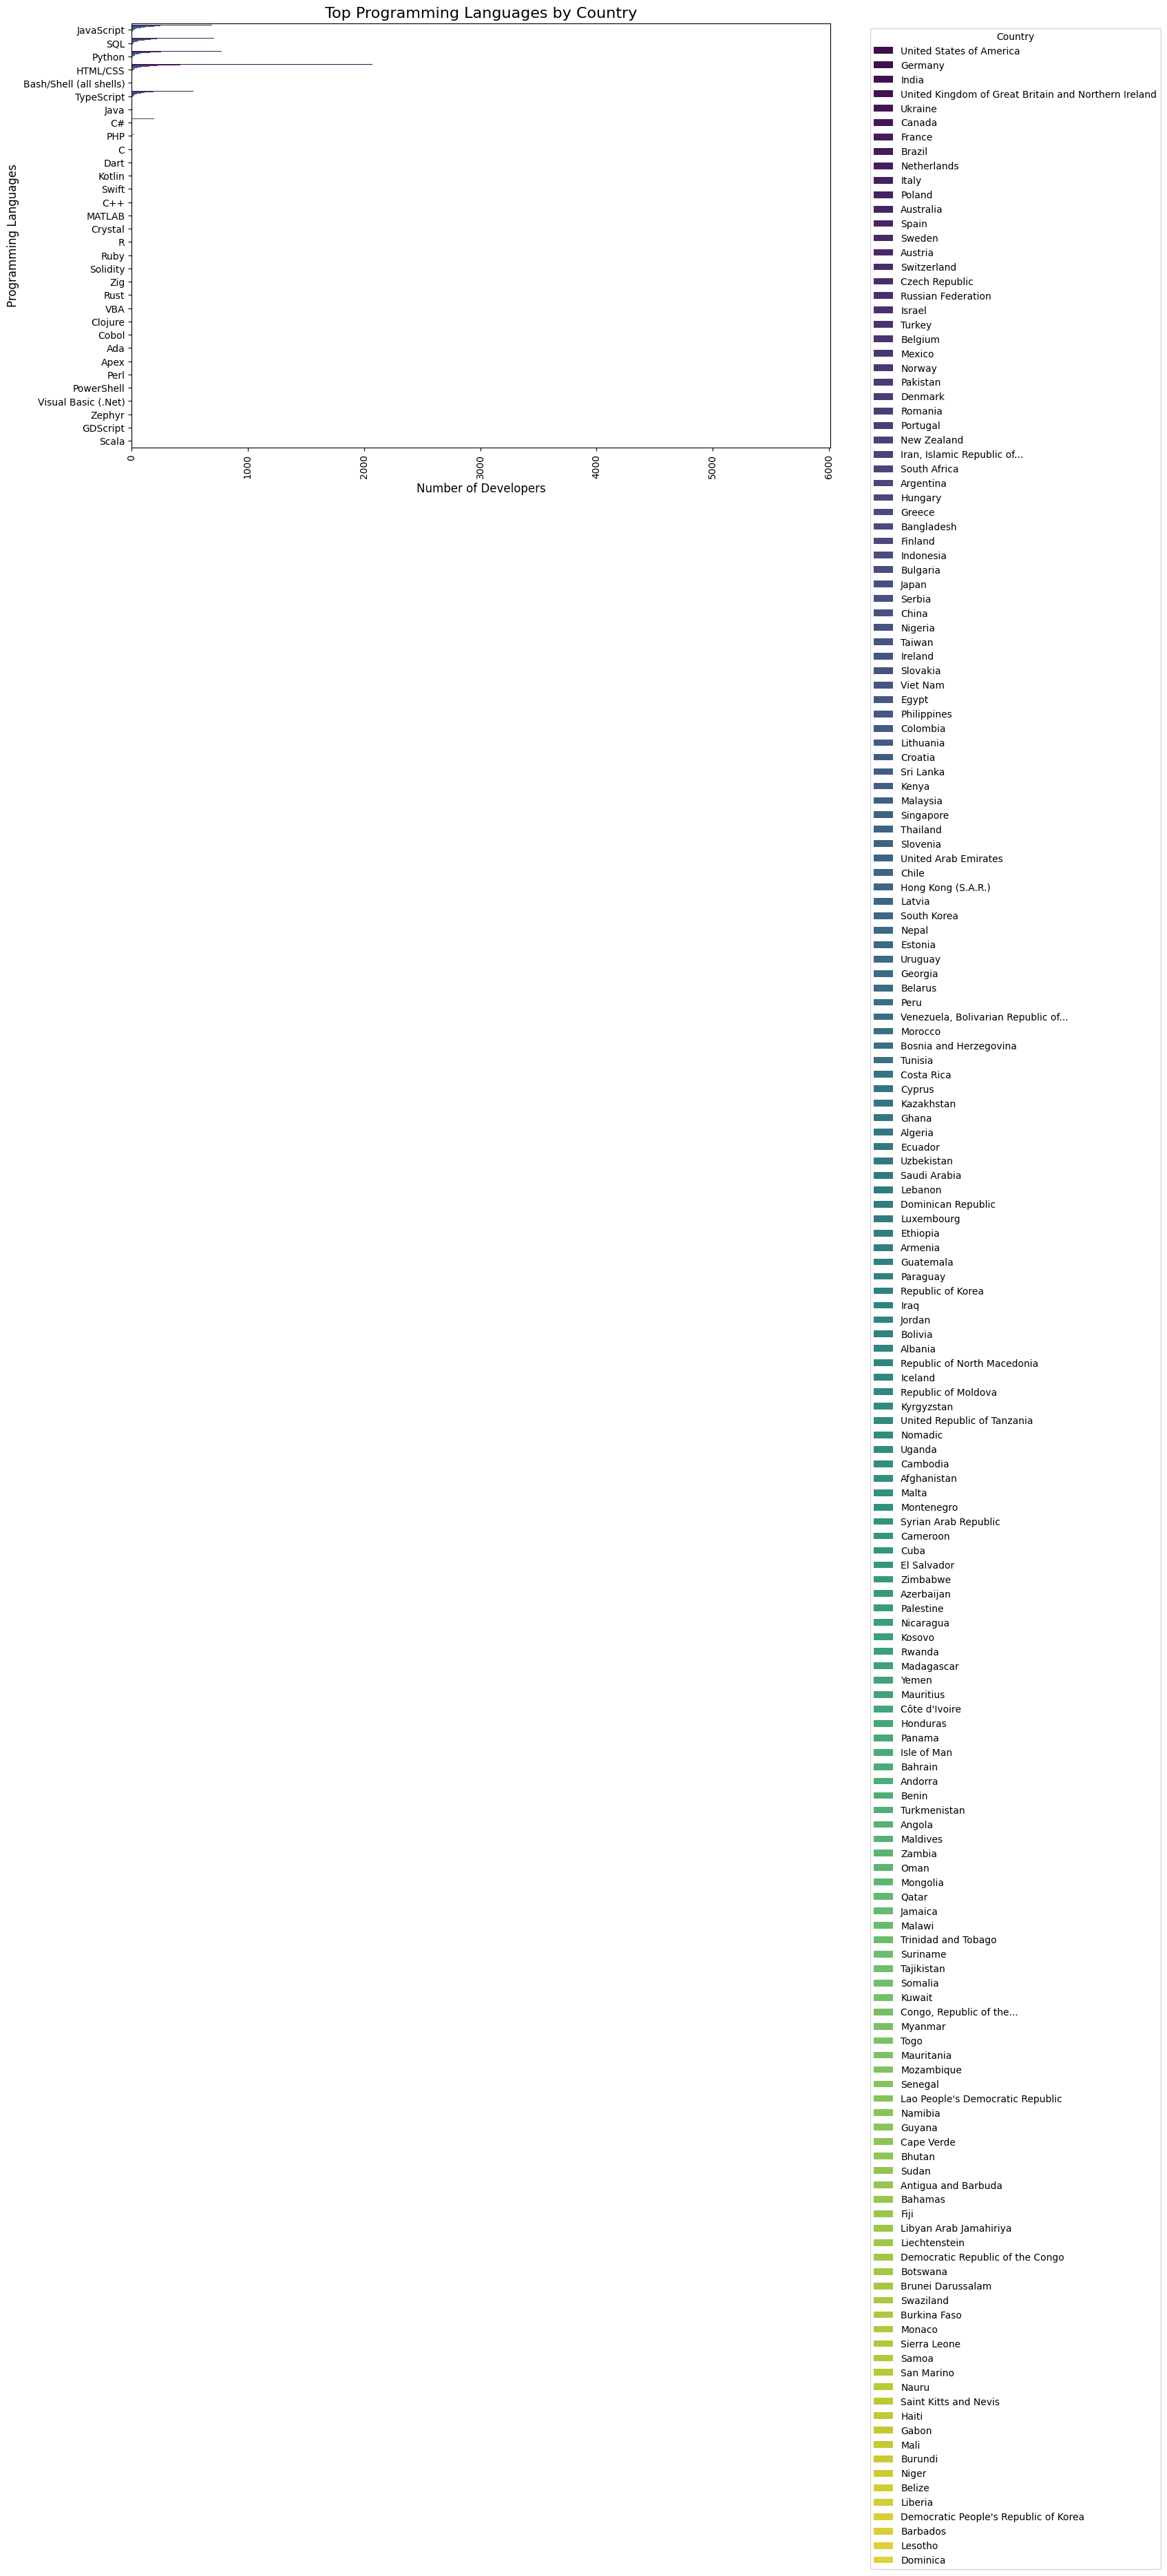

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'LanguageHaveWorkedWith' contains a list of languages
# Step 1: Explode the 'LanguageHaveWorkedWith' column
df_exploded = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
df_exploded = df_exploded.to_frame('LanguagesList')

# Step 2: Merge the exploded DataFrame with the original DataFrame to keep 'Country'
df_exploded = df_exploded.join(df['Country'])

# Step 3: Count occurrences of each language by country
language_by_country = df_exploded.groupby(['Country', 'LanguagesList']).size().reset_index(name='Count')

# Step 4: Get the top N languages for each country
# Sort by 'Count' and then get the top N languages for each country
language_by_country_sorted = language_by_country.sort_values(by='Count', ascending=False)
top_languages_by_country = language_by_country_sorted.groupby('Country').head().reset_index(drop=True)

# Step 5: Plot the bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='LanguagesList', hue='Country', data=top_languages_by_country, palette='viridis')

# Add labels and title
plt.title('Top Programming Languages by Country', fontsize=16)
plt.xlabel('Number of Developers', fontsize=12)
plt.ylabel('Programming Languages', fontsize=12)
plt.xticks(rotation=90)

# Adjust layout to avoid overlap
plt.subplots_adjust(right=0.85)

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


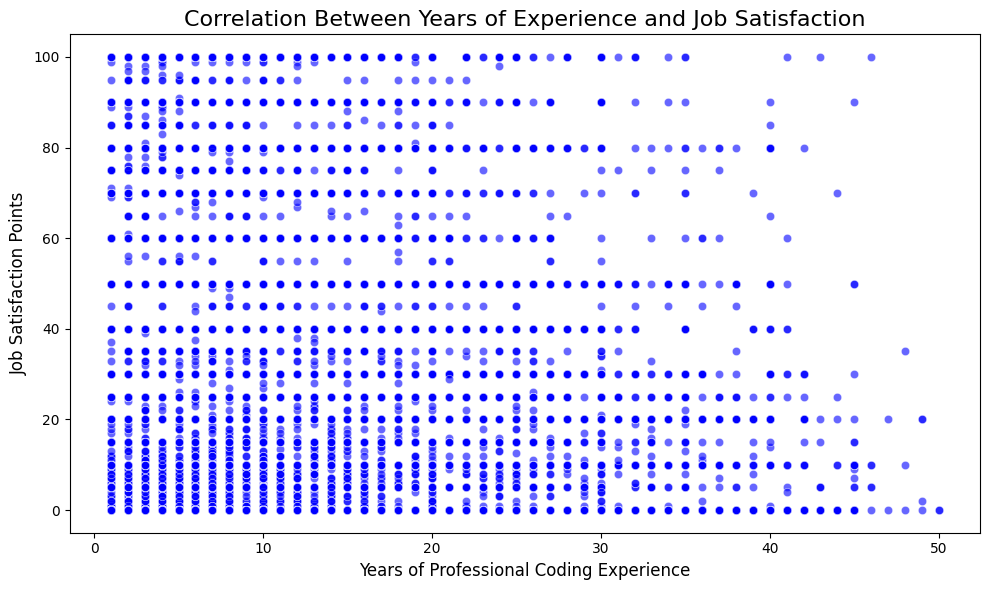

Correlation between Years of Experience and Job Satisfaction: -0.03


In [14]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the columns 'YearsCodePro' and 'JobSatPoints_1'

# Step 1: Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df, color='b', alpha=0.6)

# Step 2: Add labels and title
plt.title('Correlation Between Years of Experience and Job Satisfaction', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()
plt.show()

# Step 4: Calculate the correlation coefficient
correlation = df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(f"Correlation between Years of Experience and Job Satisfaction: {correlation:.2f}")


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 974   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      15664   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   10261   
Primary/elementary school                                           133   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1924   
Secondary school (e.g. American high school, Ge...                 1281   
Some college/university study without earning a...                 3286   
Something else                                                      318   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

<Figure size 1200x700 with 0 Axes>

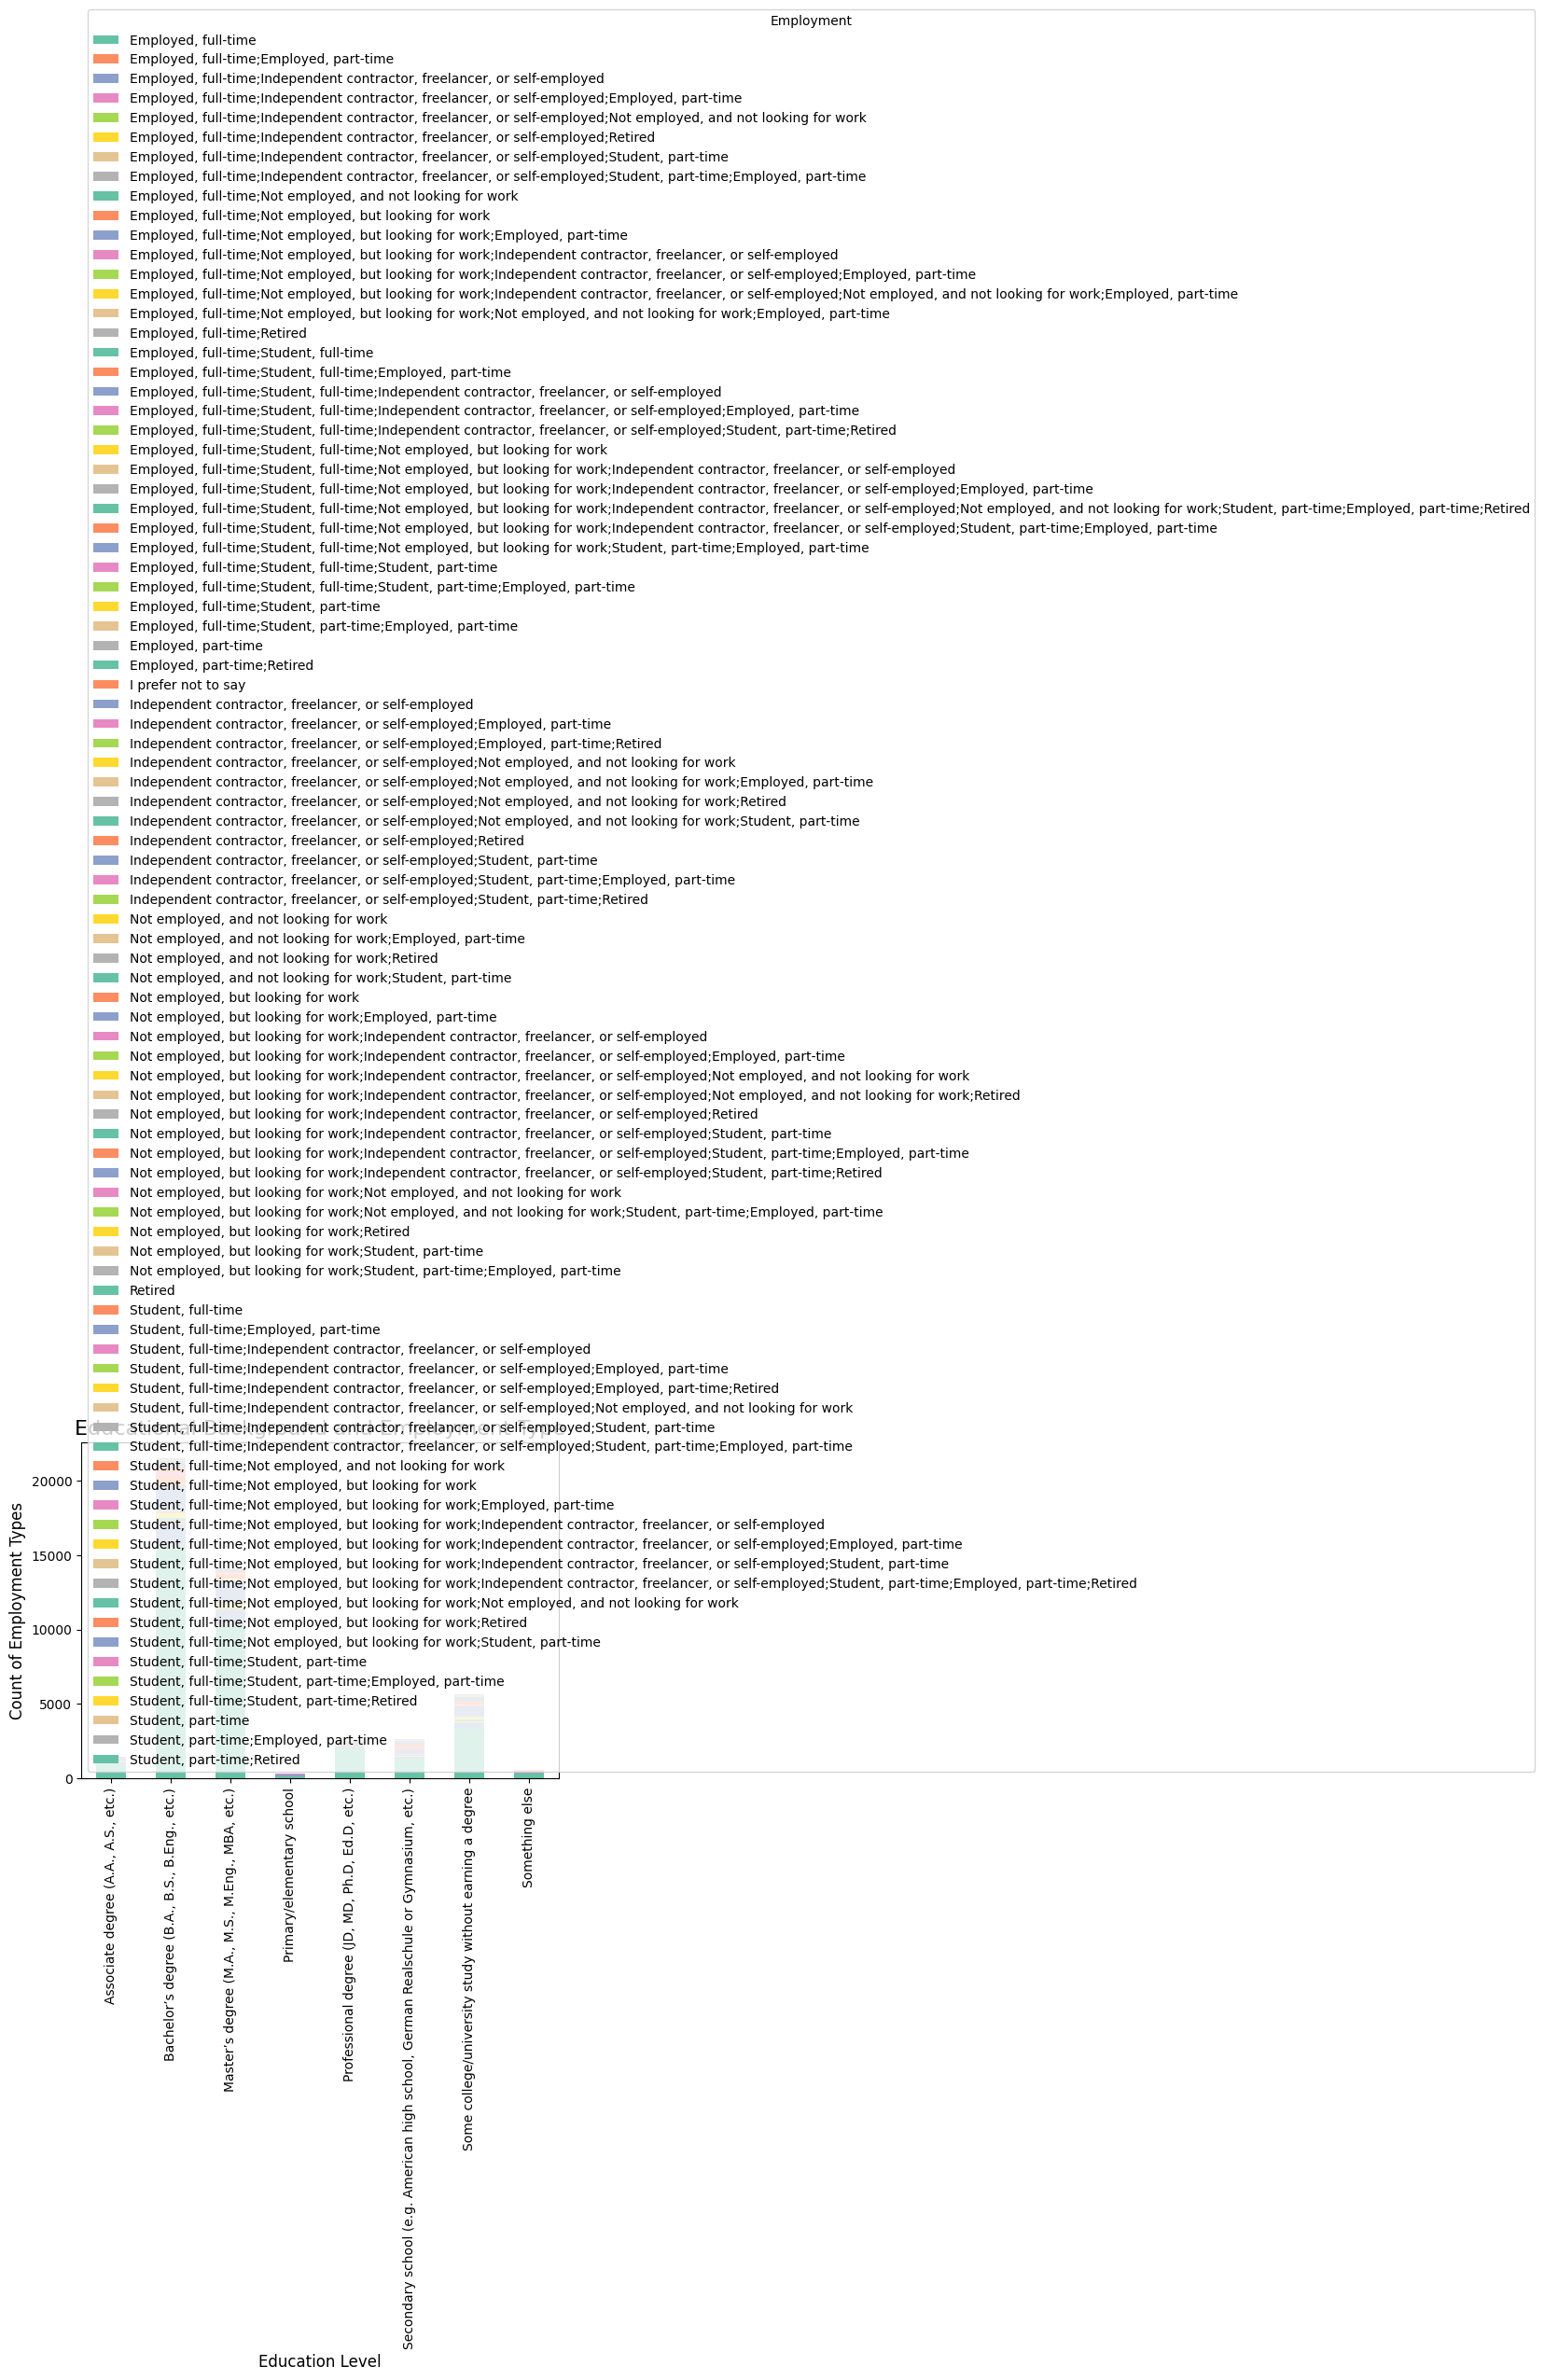

In [15]:
## Write your code here
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Cross-tabulation of EdLevel and Employment
edu_emp_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])

# Step 2: Display the cross-tabulation
print(edu_emp_crosstab)

# Step 3: Plot the cross-tabulation using a stacked bar plot
plt.figure(figsize=(12, 7))  # Increase figure size for better fit
edu_emp_crosstab.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))

# Add title and labels
plt.title('Educational Background and Employment Type', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count of Employment Types', fontsize=12)

# Adjust layout to make room for labels
plt.subplots_adjust(bottom=0.2, top=0.95, left=0.1, right=0.9)

# Show the plot
plt.show()



#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [16]:
## Write your code here
# Save the cleaned and analyzed dataset as a CSV file
df.to_csv('cleaned_analyzed_data.csv', index=False)  # index=False excludes the index from the saved file


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
